# MC Dropout (MCD) and Montecarlo Simulation (MCS)

In [1]:
%pip install fastai==2.5.3 seaborn -q -U
%pip freeze 

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\emanuele.buchicchio\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


aggdraw==1.3.15
argon2-cffi==21.3.0
argon2-cffi-bindings==21.2.0
asttokens==2.0.5
attrs==22.1.0
backcall==0.2.0
beautifulsoup4==4.11.1
bleach==5.0.1
blis==0.7.9
catalogue==2.0.8
certifi==2022.12.7
cffi==1.15.1
charset-normalizer==2.1.1
cleanlab==2.2.0
click==8.1.3
colorama==0.4.4
confection==0.0.4
cycler==0.11.0
cymem==2.0.7
debugpy==1.6.0
decorator==5.1.1
defusedxml==0.7.1
entrypoints==0.4
executing==0.8.3
exif==1.6.0
fastai==2.5.3
fastai-amalgam==0.0.26
fastcore==1.3.29
fastdownload==0.0.7
fastjsonschema==2.16.1
fastprogress==1.0.3
fonttools==4.37.1
future==0.18.2
idna==3.4
importlib-metadata==4.12.0
ipykernel==6.13.0
ipython==8.3.0
ipython-genutils==0.2.0
iso8601==1.1.0
jedi==0.18.1
Jinja2==3.1.2
joblib==1.1.0
jsonschema==4.14.0
jupyter-client==7.3.0
jupyter-core==4.10.0
jupyterlab-pygments==0.2.2
kiwisolver==1.4.4
langcodes==3.3.0
loguru==0.6.0
lxml==4.9.1
markdown-it-py==2.1.0
MarkupSafe==2.1.1
matplotlib==3.5.3
matplotlib-inline==0.1.3
matplotlib-venn==0.11.7
mdurl==0.1.2
mistune

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from fastai.vision.all import *
import sys
import seaborn as sns

c:\Users\emanuele.buchicchio\AppData\Local\Programs\Python\Python39\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# Load EB_ML python libraries
# The following libraries are used in this notebook and should be installed in your local machine before running this notebook.
# eb_colab_utils.py
# eb_ml_battery_lib.py
# eb_ml_utils.py

# path to load external *.py files used in this notebook
# Note: in Google Colab virtual machine you shoud copy the files in "/content" folder after BEFORE running this notebook's cell

external_python_file_path="/home/studio-lab-user/code"
sys.path.append(external_python_file_path)

In [4]:
from ml4measurement.eb_ml_utils import score_model,build_learner
from ml4measurement.eb_ml_colab_utils import get_root_path
from ml4measurement.eb_ml_battery_lib import generate_image_files_from_measure_table

## Configuration

In [5]:
import yaml

config_file = '../config/config.yaml'

#Read the configuration
with open(config_file) as cfg_file:
    config = yaml.load(stream = cfg_file, Loader = yaml.FullLoader)

# Map the working folder to Google Drive if is running in Google Colab environment
config['ROOT_DIR'] = get_root_path(config['working_folder'])

config['Splitter'] = RandomSplitter(valid_pct=0.3, seed=41)
config['rePat'] = r'^.*_(\d+).png$'

NOT running on COLAB


## Load Dataset

In [6]:
from LiBEIS.code.utilities import read_measurement_table

# Load dataset using LiBEIS 
_, meas_table_wide, battery_id_col_name, freq_id_col_name, impedance_col_name, measure_id_col_name, soc_col_name = read_measurement_table(config_file)

indices = np.arange(meas_table_wide.shape[0]).astype(np.uint)
meas_table_wide

MEASURE_ID  SOC BATTERY_ID     IMPEDANCE_VALUE  \
FREQUENCY_ID                                              0   
0                  02_4   10          2  0.117933-0.006453j   
1                  02_4   20          2  0.108914-0.004577j   
2                  02_4   30          2  0.105084-0.003881j   
3                  02_4   40          2  0.104545-0.003870j   
4                  02_4   50          2  0.103768-0.004256j   
..                  ...  ...        ...                 ...   
235                06_8   60          6  0.105475-0.005807j   
236                06_8   70          6  0.104604-0.006193j   
237                06_8   80          6  0.103358-0.005761j   
238                06_8   90          6  0.103680-0.005234j   
239                06_8  100          6  0.102012-0.004807j   

                                                                          \
FREQUENCY_ID                   1                   2                   3   
0             0.115688-0.005226j  0.114258-0.004235j  0.113243-0.003809j   
1             0.107390-0.003691j  0.106296-0.002381j  0.105806-0.002027j   
2             0.103869-0.003199j  0.103098-0.002013j  0.102843-0.001713j   
3             0.103324-0.002926j  0.102673-0.002098j  0.102103-0.001555j   
4             0.102449-0.003355j  0.101666-0.002424j  0.101108-0.001858j   
..                           ...                 ...                 ...   
235           0.103037-0.005163j  0.101439-0.003260j  0.100950-0.002266j   
236           0.102764-0.004643j  0.101474-0.003235j  0.100668-0.002506j   
237           0.101491-0.004417j  0.100160-0.003028j  0.099628-0.002222j   
238           0.102111-0.004055j  0.100888-0.002762j  0.100350-0.002017j   
239           0.101459-0.002807j  0.100853-0.002208j  0.100232-0.001664j   

                                                                          \
FREQUENCY_ID                   4                   5                   6   
0             0.111026-0.004652j  0.109057-0.005699j  0.106340-0.006653j   
1             0.104751-0.002257j  0.103965-0.002888j  0.102727-0.004009j   
2             0.101968-0.001720j  0.101440-0.002340j  0.100473-0.003114j   
3             0.101310-0.001838j  0.100783-0.002343j  0.100185-0.002937j   
4             0.099993-0.001833j  0.099596-0.002300j  0.099106-0.002856j   
..                           ...                 ...                 ...   
235           0.099744-0.002003j  0.099114-0.002131j  0.098424-0.002288j   
236           0.099592-0.001932j  0.098702-0.002253j  0.098120-0.002294j   
237           0.098459-0.001881j  0.097915-0.001947j  0.097327-0.002187j   
238           0.099374-0.001809j  0.098816-0.001959j  0.098189-0.002165j   
239           0.099547-0.001447j  0.099191-0.001673j  0.098627-0.002070j   

                                                                          \
FREQUENCY_ID                   7                   8                   9   
0             0.101733-0.007526j  0.097836-0.007710j  0.094492-0.007356j   
1             0.099835-0.005825j  0.096654-0.006610j  0.093300-0.006884j   
2             0.098450-0.004741j  0.095612-0.006006j  0.092412-0.006553j   
3             0.097745-0.004520j  0.095411-0.005965j  0.092198-0.006490j   
4             0.096909-0.004247j  0.094556-0.005593j  0.091448-0.006259j   
..                           ...                 ...                 ...   
235           0.096977-0.003218j  0.095176-0.004172j  0.092986-0.004747j   
236           0.096754-0.003253j  0.095009-0.003961j  0.092899-0.004740j   
237           0.096023-0.002886j  0.094421-0.003751j  0.092544-0.004401j   
238           0.096783-0.003066j  0.095252-0.004004j  0.093130-0.004682j   
239           0.097250-0.003201j  0.095518-0.004299j  0.093175-0.004895j   

                                                                          \
FREQUENCY_ID                  10                  11                  12   
0             0.090119-0.006749j  0.086891-0.006165j  0.084373-0.005057j  

## Build learner

In [7]:
def no_softMax(x): return x

Caso di test su EIS da una nuova betteria non ustilizzata per il traning. Misure reali non dati sintetici.

In [8]:
# BUILD DATA LOADER
config['ExperimentName'] = "Paper_MES_v2_single__Exp_1"
config['IMAGES_PATH'] = config['root_images_path']+"/"+config['ExperimentName']
config["TEST_IMAGES_PATH"]= "../data/images/mc_dropout_Exp1"#"../data/test_images/mc_dropout_test_Exp_0"
saved_weights = "Paper_MES_v2_single__Exp_1_1674295349.009869_SAVED" #"Paper_MES_v2_single__Exp_0_1674294950.893247_SAVED"

# BUILD LEARNER
learn = build_learner(config)


Setting-up type transforms pipelines
Found 1700 items
2 datasets of sizes 1190,510
Setting up Pipeline: PILBase.create
Setting up Pipeline: RegexLabeller -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}

Building one sample
  Pipeline: PILBase.create
    starting from
      ..\data\images\Paper_MES_v2_single__Exp_1\Paper_MES_v2_single__Exp_1-03_8009_70.png
    applying PILBase.create gives
      PILImage mode=RGB size=640x480
  Pipeline: RegexLabeller -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}
    starting from
      ..\data\images\Paper_MES_v2_single__Exp_1\Paper_MES_v2_single__Exp_1-03_8009_70.png
    applying RegexLabeller gives
      70
    applying Categorize -- {'vocab': None, 'sort': True, 'add_na': False} gives
      TensorCategory(7)

Final sample: (PILImage mode=RGB size=640x480, TensorCategory(7))


Found 1700 items
2 datasets of sizes 1190,510
Setting up Pipeline: PILBase.create
Setting up Pipeline: RegexLabeller -> Categorize -- {'vocab'

In [9]:
learn = learn.load(saved_weights)

In [10]:
test_fnames= get_image_files(config["TEST_IMAGES_PATH"])
# Data loader for test set
test_dl = learn.dls.test_dl(test_fnames,with_labels=True)
predictions, targets, decoded = learn.get_preds(dl=test_dl, with_decoded=True)

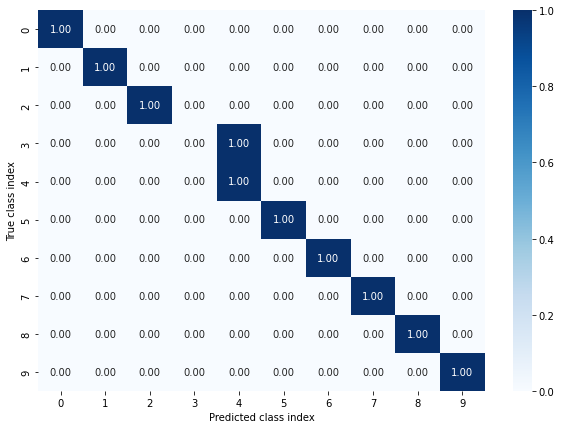

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

In [11]:
from ml4measurement.eb_ml_utils import plot_confusion_matrix

plot_confusion_matrix(targets, decoded)

In [12]:
print("target: ")
print(targets)
print("predictions (decoded):")
print(decoded)
print("classification errors (class distance):")
print(targets-decoded)

target: 
TensorCategory([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
predictions (decoded):
TensorBase([0, 1, 2, 4, 4, 5, 6, 7, 8, 9])
classification errors (class distance):
TensorCategory([ 0,  0,  0, -1,  0,  0,  0,  0,  0,  0])


Analisi caso di predizione errata:

In [13]:
#caso di test predizione errata
test_img_index=3


In [14]:
print("test image: "+str(test_fnames[test_img_index]))
print("decoded: " +str(decoded[test_img_index].numpy()))
print("target: " +str(targets[test_img_index].numpy()))

test image: ..\data\images\mc_dropout_Exp1\monte_carlo__Exp_1-06_4_30.png
decoded: 4
target: 3


## MC Dropout (MCD)

In [15]:
def MC_dropout_prediction(learner,data_loader,n_samples,activation=None):
# Call get_preds n times, then stack the predictions, yielding a tensor with shape [# of samples, batch_size, ...]
    dist_preds = []
    for i in range(n_samples):
        preds, targs, decoded = learn.get_preds(dl=test_dl, with_decoded=True, act=activation, cbs=[MCDropoutCallback()])
        dist_preds += [preds]

    y_pred_dist=torch.stack(dist_preds)
    return y_pred_dist

In [16]:
y_pred_dist_MC_logit=MC_dropout_prediction(learn,test_dl,50,activation=no_softMax)

In [17]:
y_pred_dist_MC_logit=MC_dropout_prediction(learn,test_dl,50,activation=no_softMax)

In [18]:
y_pred_dist_MC=MC_dropout_prediction(learn,test_dl,50)


In [19]:
targets

TensorCategory([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

Analisi distribuzione delle predizioni per il caso di test con predizione errats

C:\Users\emanuele.buchicchio\AppData\Local\Temp\ipykernel_8648\3487058390.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y_pred_soc, cut=0, shade=True)


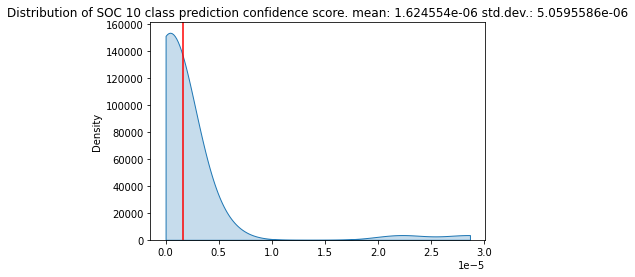

C:\Users\emanuele.buchicchio\AppData\Local\Temp\ipykernel_8648\3487058390.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y_pred_soc, cut=0, shade=True)


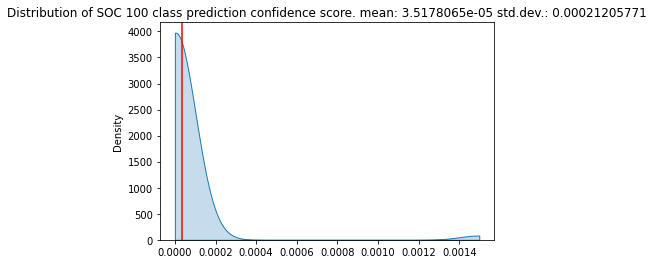

C:\Users\emanuele.buchicchio\AppData\Local\Temp\ipykernel_8648\3487058390.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y_pred_soc, cut=0, shade=True)


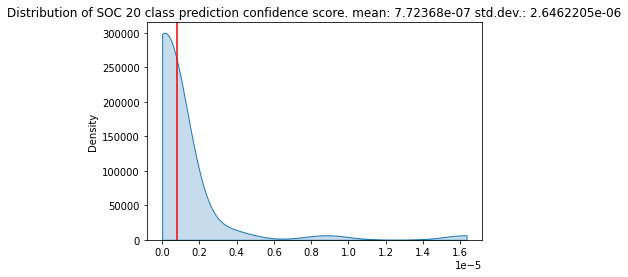

C:\Users\emanuele.buchicchio\AppData\Local\Temp\ipykernel_8648\3487058390.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y_pred_soc, cut=0, shade=True)


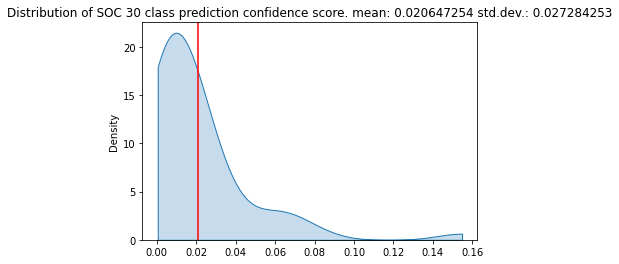

C:\Users\emanuele.buchicchio\AppData\Local\Temp\ipykernel_8648\3487058390.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y_pred_soc, cut=0, shade=True)


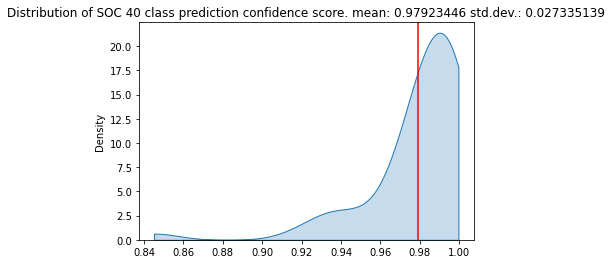

C:\Users\emanuele.buchicchio\AppData\Local\Temp\ipykernel_8648\3487058390.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y_pred_soc, cut=0, shade=True)


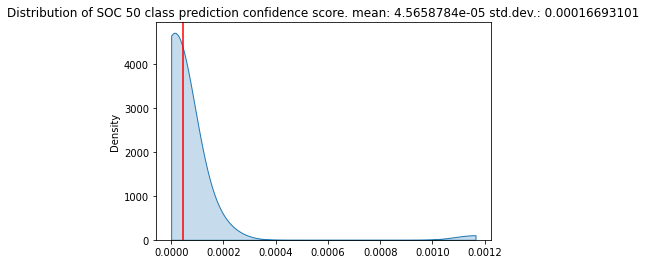

C:\Users\emanuele.buchicchio\AppData\Local\Temp\ipykernel_8648\3487058390.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y_pred_soc, cut=0, shade=True)


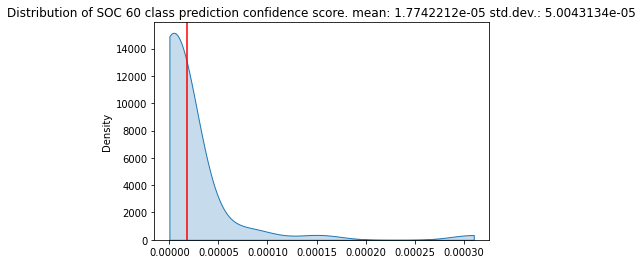

C:\Users\emanuele.buchicchio\AppData\Local\Temp\ipykernel_8648\3487058390.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y_pred_soc, cut=0, shade=True)


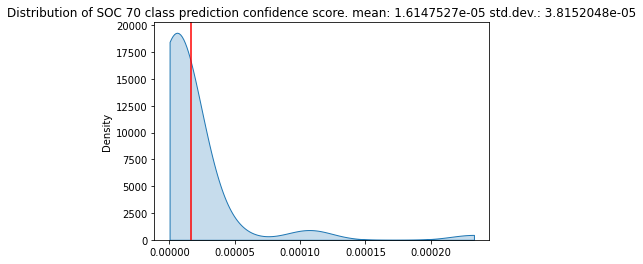

C:\Users\emanuele.buchicchio\AppData\Local\Temp\ipykernel_8648\3487058390.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y_pred_soc, cut=0, shade=True)


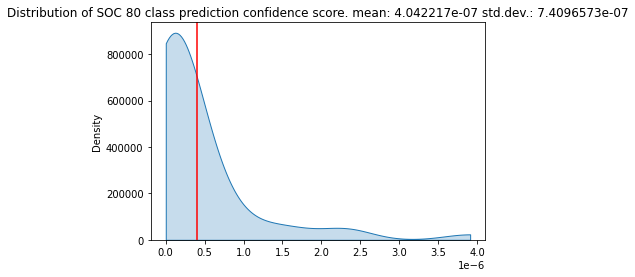

C:\Users\emanuele.buchicchio\AppData\Local\Temp\ipykernel_8648\3487058390.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y_pred_soc, cut=0, shade=True)


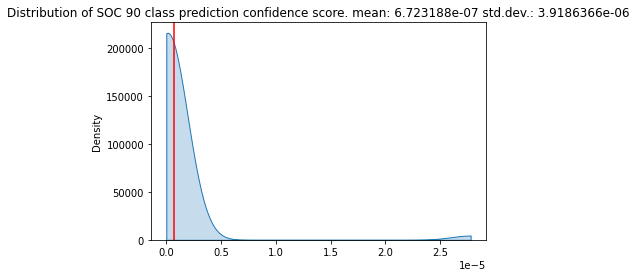

In [20]:
soc_classes=learn.dls.vocab
for class_idx in range(len(soc_classes)):
    y_pred_soc=y_pred_dist_MC[:,test_img_index,class_idx]
    y_pred_point_soc=y_pred_dist_MC[:,test_img_index,class_idx].mean(axis=0)
    std_dev=y_pred_dist_MC[:,test_img_index,class_idx].std(axis=0)
    sns.kdeplot(y_pred_soc, cut=0, shade=True)
    plt.axvline(y_pred_point_soc, color='red')
    plt.title("Distribution of SOC "+ soc_classes[class_idx]+" class prediction confidence score. mean: "+str(y_pred_point_soc.numpy())+" std.dev.: "+str(std_dev.numpy()))
    plt.show()

learn.predict (see https://docs.fast.ai/learner.html#Learner.predict )

It returns a tuple of three elements with, in reverse order, - the prediction from the model, potentially passed through the activation of the loss function (if it has one) - the decoded prediction, using the potential decodes method from it - the fully decoded prediction,

## Monte Carlo with noisy input

Mer metodo MCS utilizzo 50 ottenuti aggiungendo rumore gaussiano all curva EIS del caso di test con dev.std 0.001 ohm.

In [21]:
# BUILD DATA LOADER
config['ExperimentName'] = "Paper_MES_v2_single__Exp_1"
config['IMAGES_PATH'] = config['root_images_path']+"/"+config['ExperimentName']
config["TEST_IMAGES_PATH"]= "../data/images/monte_carlo_Exp1_batt04_30"#"../data/test_images/mc_dropout_test_Exp_0"
saved_weights = "Paper_MES_v2_single__Exp_1_1674295349.009869_SAVED" #"Paper_MES_v2_single__Exp_0_1674294950.893247_SAVED"

# BUILD LEARNER
learn = build_learner(config)
learn = learn.load(saved_weights)

Setting-up type transforms pipelines
Found 1700 items
2 datasets of sizes 1190,510
Setting up Pipeline: PILBase.create
Setting up Pipeline: RegexLabeller -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}

Building one sample
  Pipeline: PILBase.create
    starting from
      ..\data\images\Paper_MES_v2_single__Exp_1\Paper_MES_v2_single__Exp_1-03_8009_70.png
    applying PILBase.create gives
      PILImage mode=RGB size=640x480
  Pipeline: RegexLabeller -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}
    starting from
      ..\data\images\Paper_MES_v2_single__Exp_1\Paper_MES_v2_single__Exp_1-03_8009_70.png
    applying RegexLabeller gives
      70
    applying Categorize -- {'vocab': None, 'sort': True, 'add_na': False} gives
      TensorCategory(7)

Final sample: (PILImage mode=RGB size=640x480, TensorCategory(7))


Found 1700 items
2 datasets of sizes 1190,510
Setting up Pipeline: PILBase.create
Setting up Pipeline: RegexLabeller -> Categorize -- {'vocab'

In [22]:
test_fnames= get_image_files(config["TEST_IMAGES_PATH"])
# Data loader for test set
test_dl = learn.dls.test_dl(test_fnames,with_labels=True)

In [23]:
test_fnames

(#50) [Path('../data/images/monte_carlo_Exp1_batt04_30/monte_carlo__Exp_1-06_4001_30.png'),Path('../data/images/monte_carlo_Exp1_batt04_30/monte_carlo__Exp_1-06_4002_30.png'),Path('../data/images/monte_carlo_Exp1_batt04_30/monte_carlo__Exp_1-06_4003_30.png'),Path('../data/images/monte_carlo_Exp1_batt04_30/monte_carlo__Exp_1-06_4004_30.png'),Path('../data/images/monte_carlo_Exp1_batt04_30/monte_carlo__Exp_1-06_4005_30.png'),Path('../data/images/monte_carlo_Exp1_batt04_30/monte_carlo__Exp_1-06_4006_30.png'),Path('../data/images/monte_carlo_Exp1_batt04_30/monte_carlo__Exp_1-06_4007_30.png'),Path('../data/images/monte_carlo_Exp1_batt04_30/monte_carlo__Exp_1-06_4008_30.png'),Path('../data/images/monte_carlo_Exp1_batt04_30/monte_carlo__Exp_1-06_4009_30.png'),Path('../data/images/monte_carlo_Exp1_batt04_30/monte_carlo__Exp_1-06_4010_30.png')...]

In [24]:
preds, targs, decoded = learn.get_preds(dl=test_dl, with_decoded=True)

In [25]:
learn.dls.vocab

['10', '100', '20', '30', '40', '50', '60', '70', '80', '90']

In [26]:
decoded

TensorBase([4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4,
        4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 4])

su 5o campioni 49 predizioni sono errate (SOC 40 (indice 4) e solo una è corretta SOC 30 (indice 3)). La probabilità assegnata dal SoftMax alla classe 4 è molto alta

In [27]:
preds[:,4]

TensorBase([0.9885, 0.9992, 0.9725, 0.9993, 0.9993, 0.7968, 0.9997, 0.9942, 0.9891,
        0.9143, 0.2019, 0.9996, 0.9173, 0.9772, 0.9941, 0.9977, 0.9878, 0.9632,
        0.9998, 0.4623, 0.9758, 0.9820, 0.9903, 0.9989, 0.9973, 0.6333, 0.5537,
        0.9998, 0.9998, 0.9990, 0.9996, 0.9961, 0.9998, 0.9948, 0.9997, 0.9963,
        0.9972, 0.9344, 0.9495, 0.9974, 0.8345, 0.9999, 0.9999, 0.9982, 0.9940,
        0.9998, 0.9947, 0.9873, 0.9750, 0.9918])

In [28]:
y_pred_point_4=preds[:,4].mean(axis=0)

In [29]:
print(y_pred_point_4)

TensorBase(0.9385)


In [30]:
std_dev_4=preds[:,4].std(axis=0)

In [31]:
print(std_dev_4)

TensorBase(0.1542)


In [32]:
preds[:,4]

TensorBase([0.9885, 0.9992, 0.9725, 0.9993, 0.9993, 0.7968, 0.9997, 0.9942, 0.9891,
        0.9143, 0.2019, 0.9996, 0.9173, 0.9772, 0.9941, 0.9977, 0.9878, 0.9632,
        0.9998, 0.4623, 0.9758, 0.9820, 0.9903, 0.9989, 0.9973, 0.6333, 0.5537,
        0.9998, 0.9998, 0.9990, 0.9996, 0.9961, 0.9998, 0.9948, 0.9997, 0.9963,
        0.9972, 0.9344, 0.9495, 0.9974, 0.8345, 0.9999, 0.9999, 0.9982, 0.9940,
        0.9998, 0.9947, 0.9873, 0.9750, 0.9918])

C:\Users\emanuele.buchicchio\AppData\Local\Temp\ipykernel_8648\2217798891.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(preds[:,4], cut=0, shade=True)


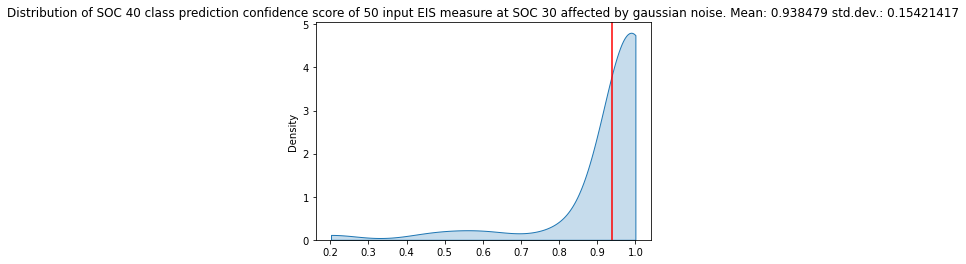

In [33]:

sns.kdeplot(preds[:,4], cut=0, shade=True)
plt.axvline(y_pred_point_4, color='red')
plt.title("Distribution of SOC 40 class prediction confidence score of 50 input EIS measure at SOC 30 affected by gaussian noise. Mean: "+ str(y_pred_point_4.numpy())+" std.dev.: "+str(std_dev_4.numpy()))
#plt.xlim([0.9999,1])
plt.show()

In [34]:
preds[:,3]

TensorBase([1.1446e-02, 5.7234e-04, 2.7525e-02, 5.5557e-04, 7.0716e-04, 2.0300e-01,
        2.8897e-04, 5.1612e-03, 1.0819e-02, 8.5637e-02, 7.9803e-01, 3.4184e-04,
        8.2199e-02, 2.2814e-02, 5.8611e-03, 2.2389e-03, 1.1919e-02, 3.6658e-02,
        1.1392e-04, 5.3761e-01, 2.4017e-02, 1.7894e-02, 9.6571e-03, 8.0646e-04,
        2.4644e-03, 3.6650e-01, 4.4607e-01, 1.3241e-04, 1.6926e-04, 8.2156e-04,
        3.0960e-04, 3.8232e-03, 1.6546e-04, 4.6711e-03, 2.7201e-04, 3.6183e-03,
        2.7790e-03, 6.5507e-02, 4.9835e-02, 2.5623e-03, 1.6513e-01, 6.4420e-05,
        1.7297e-05, 1.8271e-03, 5.9901e-03, 1.5124e-04, 5.0286e-03, 1.2625e-02,
        2.4946e-02, 8.2218e-03])

C:\Users\emanuele.buchicchio\AppData\Local\Temp\ipykernel_8648\766403924.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(preds[:,3], cut=0, shade=True)


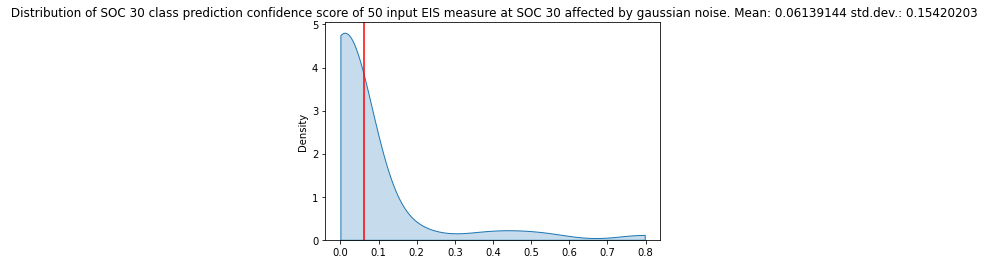

In [35]:
std_dev_3=preds[:,3].std(axis=0)
y_pred_point_3=preds[:,3].mean(axis=0)
sns.kdeplot(preds[:,3], cut=0, shade=True)
plt.axvline(y_pred_point_3, color='red')
plt.title(" Distribution of SOC 30 class prediction confidence score of 50 input EIS measure at SOC 30 affected by gaussian noise. Mean: "+ str(y_pred_point_3.numpy())+" std.dev.: "+str(std_dev_3.numpy()))
#plt.xlim([0.9999,1])
plt.show()

mean soc40: 0.97923446
 MCD std. dev. soc40: 0.027335139


C:\Users\emanuele.buchicchio\AppData\Local\Temp\ipykernel_8648\2532017194.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y_pred_dist_MC[:,test_img_index,4], cut=0, shade=True, color='blue')
C:\Users\emanuele.buchicchio\AppData\Local\Temp\ipykernel_8648\2532017194.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y_pred_dist_MC[:,test_img_index,3], cut=0, shade=True, color='orange')


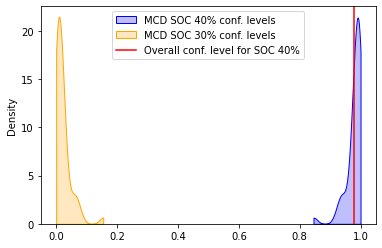

In [36]:
MC_mean_40= y_pred_dist_MC[:,test_img_index,4].mean(axis=0).numpy()
MC_std_40= y_pred_dist_MC[:,test_img_index,4].std(axis=0).numpy()
print("mean soc40: "+str(MC_mean_40))
print(" MCD std. dev. soc40: "+str(MC_std_40))

sns.kdeplot(y_pred_dist_MC[:,test_img_index,4], cut=0, shade=True, color='blue')
sns.kdeplot(y_pred_dist_MC[:,test_img_index,3], cut=0, shade=True, color='orange')
plt.axvline(MC_mean_40, color='red')
#plt.title("SOC 30 and SOC 40 () class prediction probability of 50 input EIS measure at SOC 30 affected by gaussian noise. Mean: "+ str(y_pred_point_3.numpy())+" std.dev.: "+str(std_dev_3.numpy()))
#plt.xlim([0.9999,1])
plt.legend(['MCD SOC 40% conf. levels ','MCD SOC 30% conf. levels ','Overall conf. level for SOC 40%'], loc='upper center')
plt.show()

In [37]:
print("MCS std. dev. soc40: "+str(preds[:,4].std(axis=0).numpy()))

MCS std. dev. soc40: 0.15421417


C:\Users\emanuele.buchicchio\AppData\Local\Temp\ipykernel_8648\879026817.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(preds[:,4], cut=0, shade=True, color='blue')
C:\Users\emanuele.buchicchio\AppData\Local\Temp\ipykernel_8648\879026817.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(preds[:,3], cut=0, shade=True, color='orange')


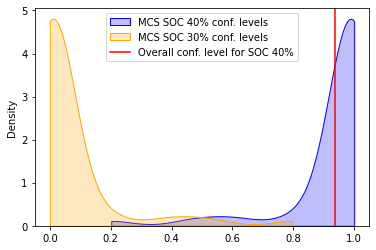

In [38]:

sns.kdeplot(preds[:,4], cut=0, shade=True, color='blue')
sns.kdeplot(preds[:,3], cut=0, shade=True, color='orange')
plt.axvline(y_pred_point_4, color='red')
#plt.title("SOC 30 and SOC 40 () class prediction probability of 50 input EIS measure at SOC 30 affected by gaussian noise. Mean: "+ str(y_pred_point_3.numpy())+" std.dev.: "+str(std_dev_3.numpy()))
#plt.xlim([0.9999,1])
plt.legend(['MCS SOC 40% conf. levels ','MCS SOC 30% conf. levels ','Overall conf. level for SOC 40%'], loc='upper center')
plt.show()

Confronto tra le distribuzioni delle predizioni con MCD e MCS per il caso di errore

C:\Users\emanuele.buchicchio\AppData\Local\Temp\ipykernel_8648\3935454470.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y_pred_dist_MC[:,test_img_index,4], color='orange', cut=0, shade=True)
C:\Users\emanuele.buchicchio\AppData\Local\Temp\ipykernel_8648\3935454470.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(preds[:,4], cut=0, shade=True, color='lightblue')


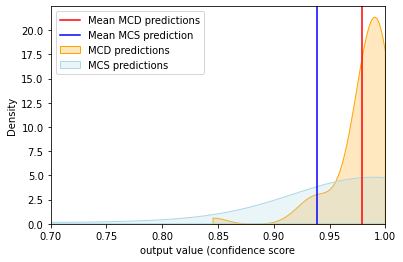

In [39]:
plt.axvline(y_pred_dist_MC[:,test_img_index,4].mean(axis=0), color='red')
plt.axvline(y_pred_point_4, color='blue')
sns.kdeplot(y_pred_dist_MC[:,test_img_index,4], color='orange', cut=0, shade=True)
sns.kdeplot(preds[:,4], cut=0, shade=True, color='lightblue')
plt.xlim([0.7,1])
plt.xlabel("output value (confidence score")
plt.ylabel("Density")
plt.legend(["Mean MCD predictions","Mean MCS prediction","MCD predictions","MCS predictions"])

# Confronto MCD e MCS in caso predizione Corretta

## MCD

In [40]:
# BUILD DATA LOADER
config['ExperimentName'] = "Paper_MES_v2_single__Exp_1"
config['IMAGES_PATH'] = config['root_images_path']+"/"+config['ExperimentName']
config["TEST_IMAGES_PATH"]= "../data/images/mc_dropout_Exp1"#"../data/test_images/mc_dropout_test_Exp_0"
saved_weights = "Paper_MES_v2_single__Exp_1_1674295349.009869_SAVED" #"Paper_MES_v2_single__Exp_0_1674294950.893247_SAVED"

# BUILD LEARNER
learn = build_learner(config)
learn = learn.load(saved_weights)

Setting-up type transforms pipelines
Found 1700 items
2 datasets of sizes 1190,510
Setting up Pipeline: PILBase.create
Setting up Pipeline: RegexLabeller -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}

Building one sample
  Pipeline: PILBase.create
    starting from
      ..\data\images\Paper_MES_v2_single__Exp_1\Paper_MES_v2_single__Exp_1-03_8009_70.png
    applying PILBase.create gives
      PILImage mode=RGB size=640x480
  Pipeline: RegexLabeller -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}
    starting from
      ..\data\images\Paper_MES_v2_single__Exp_1\Paper_MES_v2_single__Exp_1-03_8009_70.png
    applying RegexLabeller gives
      70
    applying Categorize -- {'vocab': None, 'sort': True, 'add_na': False} gives
      TensorCategory(7)

Final sample: (PILImage mode=RGB size=640x480, TensorCategory(7))


Found 1700 items
2 datasets of sizes 1190,510
Setting up Pipeline: PILBase.create
Setting up Pipeline: RegexLabeller -> Categorize -- {'vocab'

In [41]:
test_fnames= get_image_files(config["TEST_IMAGES_PATH"])
# Data loader for test set
test_dl = learn.dls.test_dl(test_fnames,with_labels=True)
predictions, targets, decoded = learn.get_preds(dl=test_dl, with_decoded=True)

#confidence score for each class without softmax
predictions_logit  = learn.get_preds(dl=test_dl, with_decoded=True, act=no_softMax)

In [42]:
y_pred_dist_MC=MC_dropout_prediction(learn,test_dl,50)
y_pred_dist_MC_logit=MC_dropout_prediction(learn,test_dl,50,activation=no_softMax)

In [43]:
test_img_index=0
print("test image: "+str(test_fnames[test_img_index]))
print("decoded: " +str(decoded[test_img_index].numpy()))
print("target: " +str(targets[test_img_index].numpy()))

test image: ..\data\images\mc_dropout_Exp1\monte_carlo__Exp_1-06_4_10.png
decoded: 0
target: 0


## MCS

In [44]:
# BUILD DATA LOADER
config['ExperimentName'] = "Paper_MES_v2_single__Exp_1"
config['IMAGES_PATH'] = config['root_images_path']+"/"+config['ExperimentName']
config["TEST_IMAGES_PATH"]= "../data/images/monte_carlo_Exp1_batt06_Meas4_Soc10"
saved_weights = "Paper_MES_v2_single__Exp_1_1674295349.009869_SAVED" #"Paper_MES_v2_single__Exp_0_1674294950.893247_SAVED"

# BUILD LEARNER
learn = build_learner(config)
learn = learn.load(saved_weights)

Setting-up type transforms pipelines
Found 1700 items
2 datasets of sizes 1190,510
Setting up Pipeline: PILBase.create
Setting up Pipeline: RegexLabeller -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}

Building one sample
  Pipeline: PILBase.create
    starting from
      ..\data\images\Paper_MES_v2_single__Exp_1\Paper_MES_v2_single__Exp_1-03_8009_70.png
    applying PILBase.create gives
      PILImage mode=RGB size=640x480
  Pipeline: RegexLabeller -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}
    starting from
      ..\data\images\Paper_MES_v2_single__Exp_1\Paper_MES_v2_single__Exp_1-03_8009_70.png
    applying RegexLabeller gives
      70
    applying Categorize -- {'vocab': None, 'sort': True, 'add_na': False} gives
      TensorCategory(7)

Final sample: (PILImage mode=RGB size=640x480, TensorCategory(7))


Found 1700 items
2 datasets of sizes 1190,510
Setting up Pipeline: PILBase.create
Setting up Pipeline: RegexLabeller -> Categorize -- {'vocab'

In [45]:
test_fnames= get_image_files(config["TEST_IMAGES_PATH"])
# Data loader for test set
test_dl = learn.dls.test_dl(test_fnames,with_labels=True)
predictions, targets, decoded = learn.get_preds(dl=test_dl, with_decoded=True)
#confidence score for each class without softmax
predictions_logit  = learn.get_preds(dl=test_dl, with_decoded=True, act=no_softMax)

In [46]:
decoded

TensorBase([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0])

In [47]:
y_pred_dist_MCD = y_pred_dist_MC[:,0,]
y_pred_dist_MCD_logit = y_pred_dist_MC_logit[:,0,]

In [48]:
y_pred_dist_MCD.size()

torch.Size([50, 10])

In [61]:
y_pred_dist_MCS = predictions
y_pred_dist_MCS_logit = predictions_logit[0]

In [50]:
y_pred_dist_MCS.size()

torch.Size([50, 10])

In [51]:
class_index=0

C:\Users\emanuele.buchicchio\AppData\Local\Temp\ipykernel_8648\3129834823.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y_pred_dist_MCD_logit[:,class_index], color='orange', cut=0, shade=True)
C:\Users\emanuele.buchicchio\AppData\Local\Temp\ipykernel_8648\3129834823.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y_pred_dist_MCS_logit[:,class_index], cut=0, shade=True, color='lightblue')


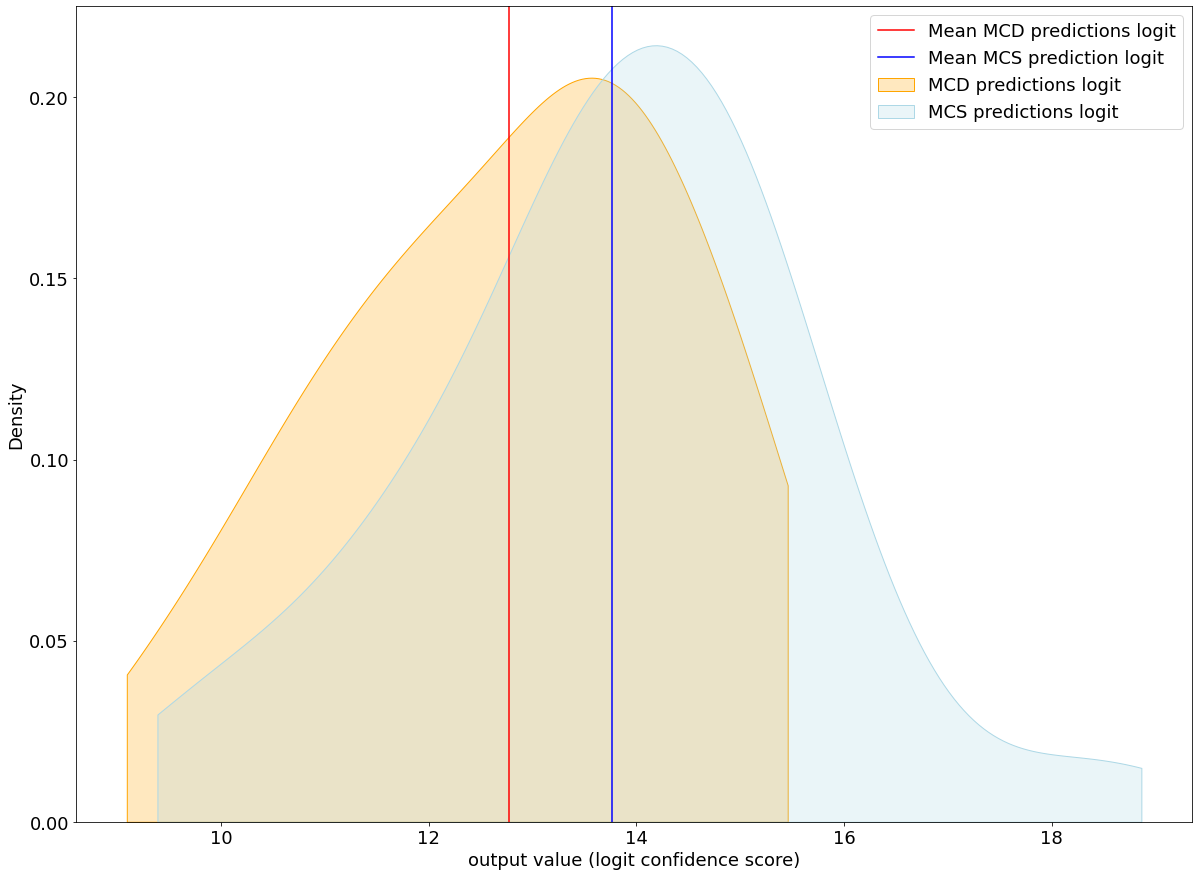

In [91]:
#set the size of the figure
plt.figure(figsize=(20,15))
#label font size
plt.rcParams.update({'font.size': 18})

plt.axvline(y_pred_dist_MCD_logit[:,class_index].mean(axis=0), color='red')
plt.axvline(y_pred_dist_MCS_logit[:,class_index].mean(axis=0), color='blue')
sns.kdeplot(y_pred_dist_MCD_logit[:,class_index], color='orange', cut=0, shade=True)
sns.kdeplot(y_pred_dist_MCS_logit[:,class_index], cut=0, shade=True, color='lightblue')
#plt.xlim([0.95,1])
#plt.ylim([0,200])

plt.xlabel("output value (logit confidence score)")
plt.ylabel("Density")
plt.legend(["Mean MCD predictions logit","Mean MCS prediction logit","MCD predictions logit","MCS predictions logit"])

# save the figure to disk
plt.savefig("MCD_MCS_comparison_logit2.png")

C:\Users\emanuele.buchicchio\AppData\Local\Temp\ipykernel_8648\716038089.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y_pred_dist_MCD[:,class_index], color='orange', cut=0, shade=True)
C:\Users\emanuele.buchicchio\AppData\Local\Temp\ipykernel_8648\716038089.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y_pred_dist_MCS[:,class_index], cut=0, shade=True, color='lightblue')


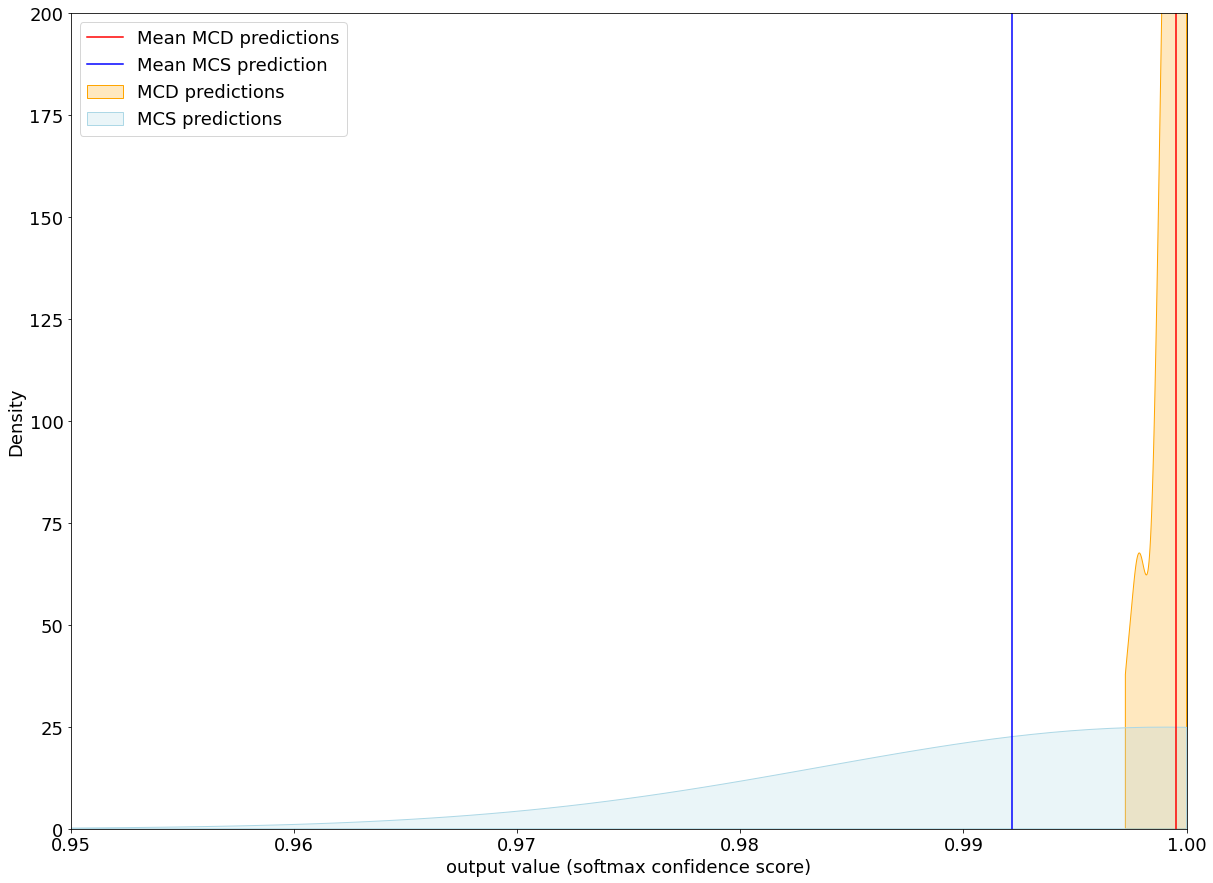

In [90]:
plt.figure(figsize=(20,15))
plt.axvline(y_pred_dist_MCD[:,class_index].mean(axis=0), color='red')
plt.axvline(y_pred_dist_MCS[:,class_index].mean(axis=0), color='blue')
sns.kdeplot(y_pred_dist_MCD[:,class_index], color='orange', cut=0, shade=True)
sns.kdeplot(y_pred_dist_MCS[:,class_index], cut=0, shade=True, color='lightblue')
plt.xlim([0.95,1])
plt.ylim([0,200])
plt.xlabel("output value (softmax confidence score)")
plt.ylabel("Density")
plt.legend(["Mean MCD predictions","Mean MCS prediction","MCD predictions","MCS predictions"])

# save the figure to disk
plt.savefig("MCD_MCS_comparison_softmax2.png")

In [67]:
y_pred_dist_MCD.std()

TensorBase(0.3001)

In [68]:
y_pred_dist_MCS.std()

TensorBase(0.2981)

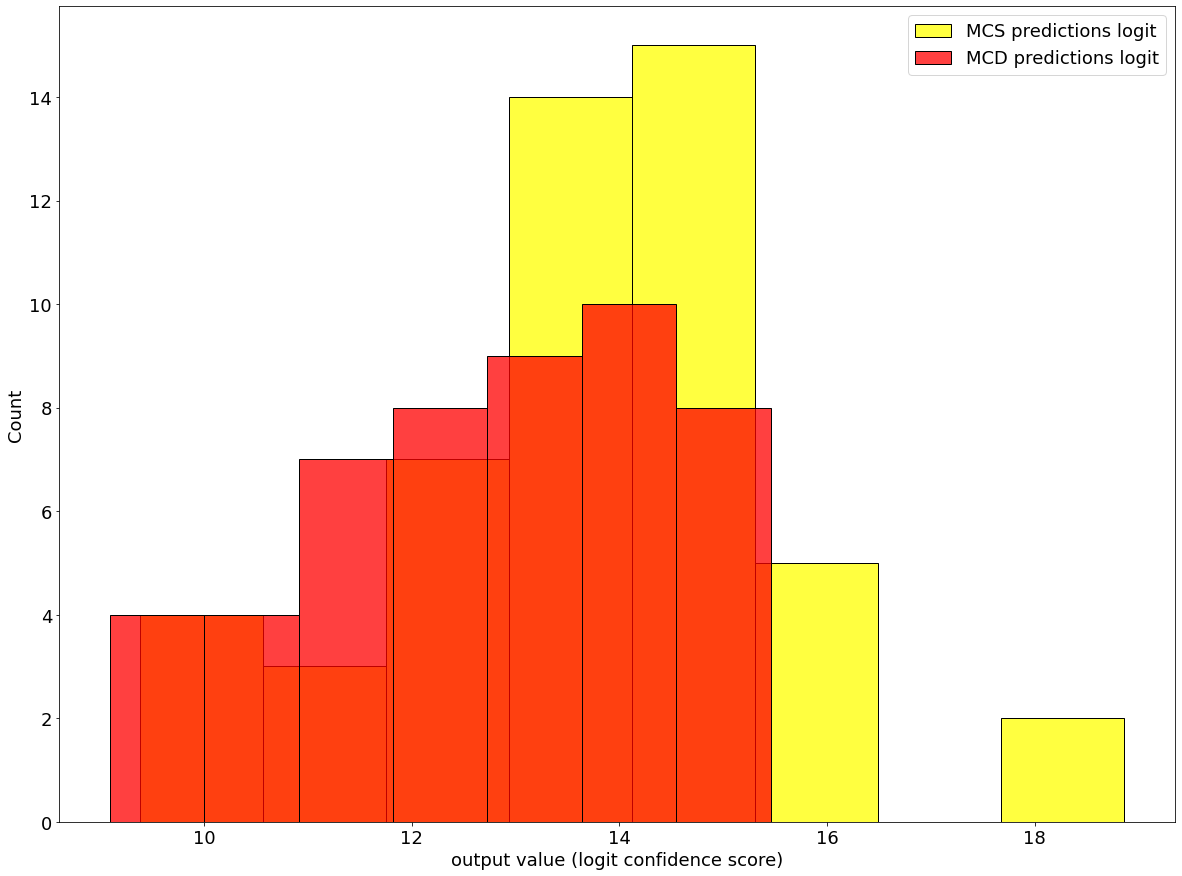

In [89]:
plt.figure(figsize=(20,15))
sns.histplot(y_pred_dist_MCS_logit[:,class_index], color='yellow')
sns.histplot(y_pred_dist_MCD_logit[:,class_index], color='red')
#plt.xlim([0.9825,1])
#plt.ylim([0,200])
plt.xlabel("output value (logit confidence score)")
plt.legend(["MCS predictions logit","MCD predictions logit"])

# save the figure to disk
plt.savefig("MCD_MCS_comparison_logit.png")

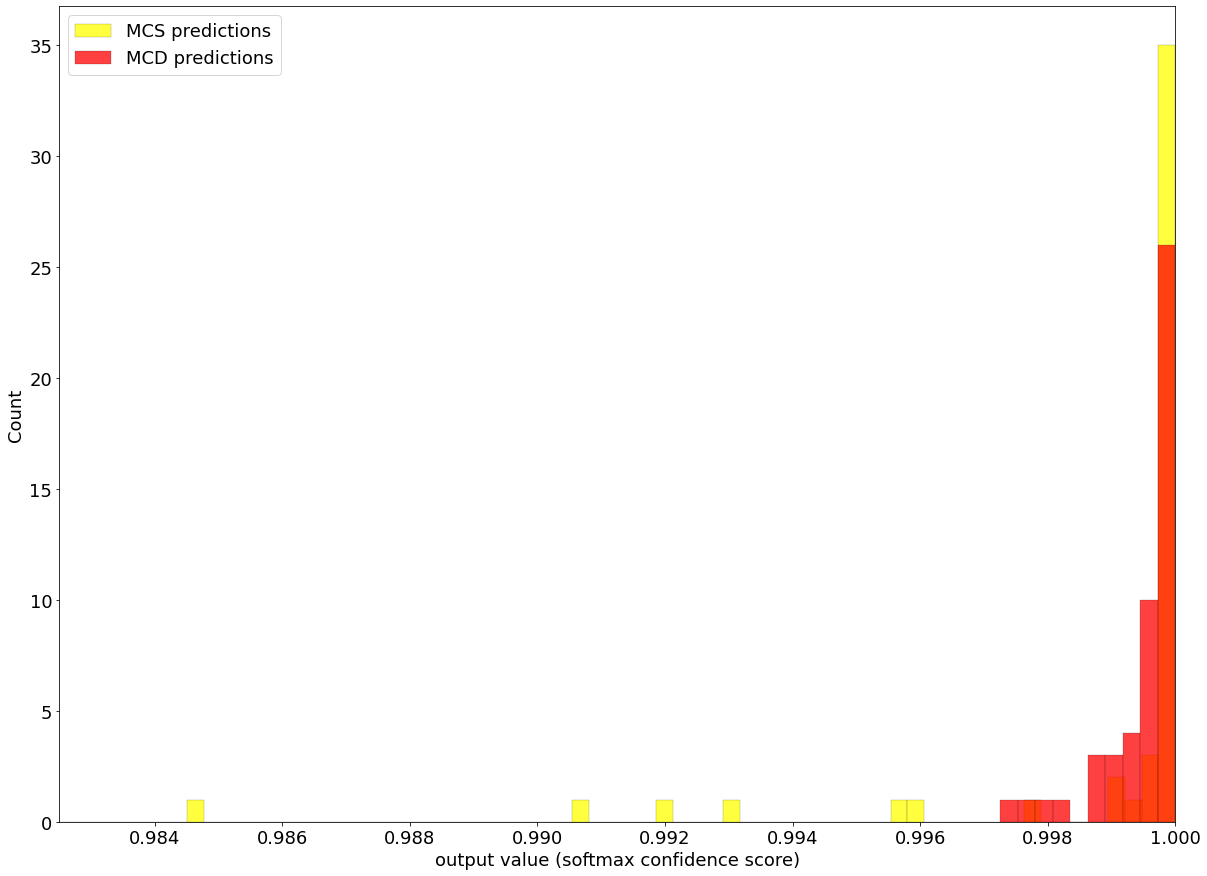

In [88]:
plt.figure(figsize=(20,15))
sns.histplot(y_pred_dist_MCS[:,class_index], color='yellow')
sns.histplot(y_pred_dist_MCD[:,class_index], color='red')
plt.xlim([0.9825,1])
#plt.ylim([0,200])
plt.xlabel("output value (softmax confidence score)")
plt.legend(["MCS predictions","MCD predictions"])

# save the figure to disk
plt.savefig("MCD_MCS_comparison_softmax.png")

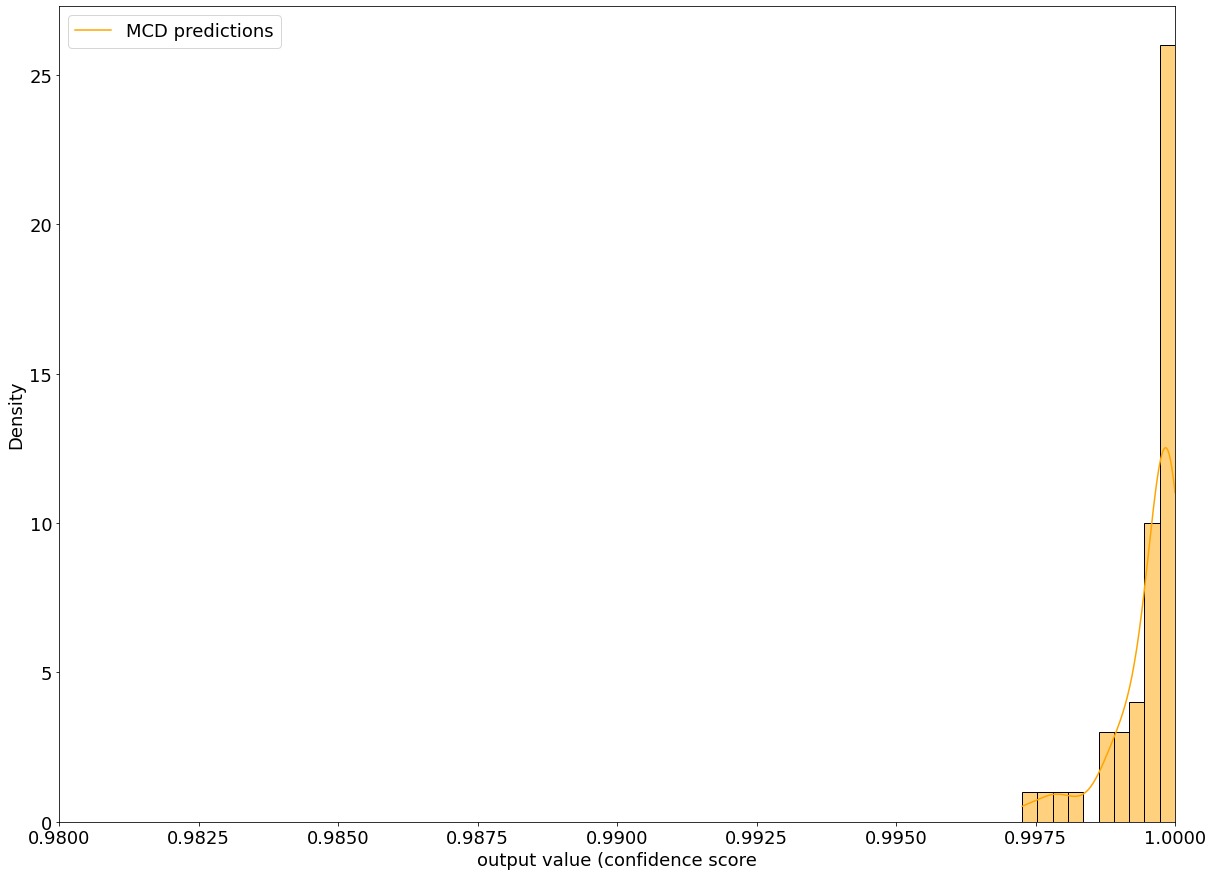

In [86]:
plt.figure(figsize=(20,15))
#plt.axvline(y_pred_dist_MCD[:,class_index].mean(axis=0), color='red')
#plt.axvline(y_pred_dist_MCS[:,class_index].mean(axis=0), color='blue')
sns.histplot(y_pred_dist_MCD[:,class_index], color='orange', kde=True )
#sns.histplot(y_pred_dist_MCS[:,class_index], color='lightblue')
plt.xlim([0.98,1])
#plt.ylim([0,200])
plt.xlabel("output value (confidence score")
plt.ylabel("Density")
plt.legend(["MCD predictions"])

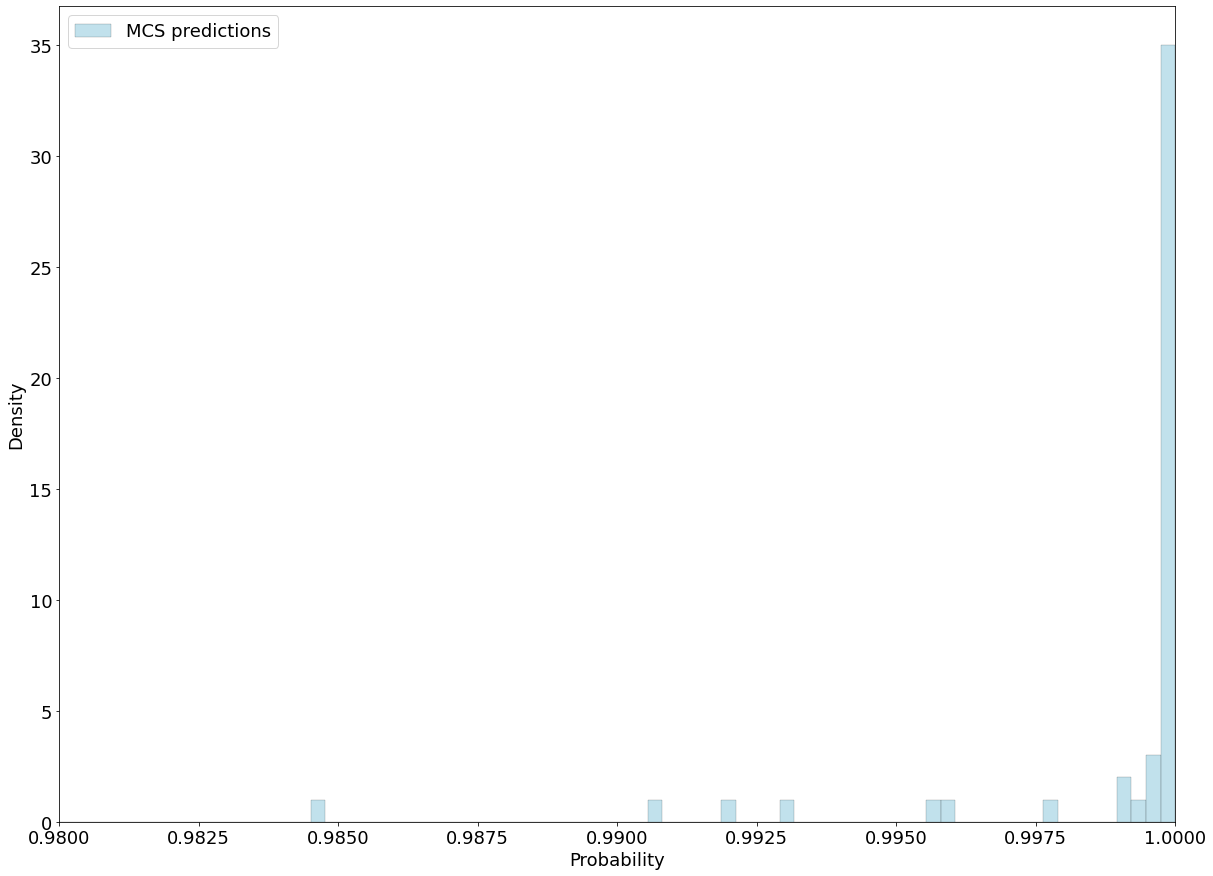

In [87]:
plt.figure(figsize=(20,15))
#plt.axvline(y_pred_dist_MCD[:,class_index].mean(axis=0), color='red')
#plt.axvline(y_pred_dist_MCS[:,class_index].mean(axis=0), color='blue')
#sns.histplot(y_pred_dist_MCD[:,class_index], color='orange', )
sns.histplot(y_pred_dist_MCS[:,class_index], color='lightblue')
plt.xlim([0.98,1])
#plt.ylim([0,200])
plt.xlabel("Probability")
plt.ylabel("Density")
plt.legend(["MCS predictions"])